# STRATEGY:

- Import files, clean (pre-processing), describe statistics and general info about features
- Feature engineering: derive new features according to metadata
- Calculate correlations between features and with class
    - We should remove features highly correlated with other features, and keep the high correlated with class
- Distribution of specific features with the class: histograms, density-plots, pivot-tables, scatter-plot
- Confusion matrix with simple classifiers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")
train.head()


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [10]:
#Statistical description of variables
train.describe(include='all')

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A658071,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [11]:
# See the column data types and non-missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB


In [12]:
train["DateTime"]

0        2014-02-12 18:22:00
1        2013-10-13 12:44:00
2        2015-01-31 12:28:00
3        2014-07-11 19:09:00
4        2013-11-15 12:52:00
5        2014-04-25 13:04:00
6        2015-03-28 13:11:00
7        2015-04-30 17:02:00
8        2014-02-04 17:17:00
9        2014-05-03 07:48:00
10       2013-12-05 15:50:00
11       2013-11-04 14:48:00
12       2016-02-03 11:27:00
13       2015-06-08 16:30:00
14       2015-11-25 15:00:00
15       2014-07-12 12:10:00
16       2014-05-03 16:15:00
17       2014-06-07 12:54:00
18       2014-05-17 11:32:00
19       2014-07-30 17:34:00
20       2014-01-19 15:03:00
21       2015-09-18 15:19:00
22       2015-08-15 14:22:00
23       2013-10-28 16:32:00
24       2014-04-09 17:44:00
25       2015-10-03 15:44:00
26       2016-01-15 17:31:00
27       2015-03-25 18:50:00
28       2015-11-21 13:01:00
29       2015-07-30 14:30:00
                ...         
26699    2014-04-21 14:01:00
26700    2015-06-15 19:28:00
26701    2014-06-15 17:41:00
26702    2015-

In [19]:
%run functions.py
names = train["Name"].value_counts()
countings_values = train["Name"].value_counts().tolist()
minimum_counting = np.percentile(countings_values, 95, axis=0)

print(countings_values)

[136, 135, 107, 106, 94, 87, 86, 85, 68, 66, 61, 58, 57, 57, 55, 55, 54, 53, 53, 52, 51, 50, 48, 48, 47, 46, 45, 44, 44, 44, 43, 43, 42, 42, 41, 40, 40, 39, 38, 38, 38, 38, 37, 36, 36, 36, 35, 35, 35, 35, 34, 34, 34, 33, 32, 32, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 29, 29, 29, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,

In [6]:
df =process_name(train)
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Unknown_Name,Common_Name
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0,0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,0,1
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,0,0
3,A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,1,0
4,A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,1,0


In [ ]:
#Deal with dates
#https://medium.com/jbennetcodes/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f 

## Pre-processing and observing dataset

In [20]:
%run functions_andreia.py
train = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")

def pre_process(df):
    df = process_date_attributes(df)
    df = process_name(df)
    toDummy=["TimeOfDay", "AnimalType"]
    for column in toDummy:
        df = create_dummies(df, column)
    return df
    
train=pre_process(train)
holdout=pre_process(holdout)

print(train.head())
print(train.info())



  AnimalID     Name      OutcomeType OutcomeSubtype SexuponOutcome  \
0  A671945  Hambone  Return_to_owner            NaN  Neutered Male   
1  A656520    Emily       Euthanasia      Suffering  Spayed Female   
2  A686464   Pearce         Adoption         Foster  Neutered Male   
3  A683430  Unknown         Transfer        Partner    Intact Male   
4  A667013  Unknown         Transfer        Partner  Neutered Male   

  AgeuponOutcome                        Breed        Color  DayTime  YearTime  \
0         1 year        Shetland Sheepdog Mix  Brown/White       12      2014   
1         1 year       Domestic Shorthair Mix  Cream Tabby       13      2013   
2        2 years                 Pit Bull Mix   Blue/White       31      2015   
3        3 weeks       Domestic Shorthair Mix   Blue Cream       11      2014   
4        2 years  Lhasa Apso/Miniature Poodle          Tan       15      2013   

        ...           Month_cos WeekDay_sin WeekDay_cos Unknown_Name  \
0       ...        8

In [53]:
train.describe(include='all')

,AnimalID,Name,OutcomeType,OutcomeSubtype,SexuponOutcome,AgeuponOutcome,Breed,Color,DayTime,YearTime,...,Month_cos,WeekDay_sin,WeekDay_cos,Unknown_Name,Common_Name,TimeOfDay_Afternoon,TimeOfDay_Evening,TimeOfDay_Morning,AnimalType_Cat,AnimalType_Dog
count,26729,26729,26729,13117,26728,26711,26729,26729,26729.000000,26729.000000,...,2.672900e+04,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000,26729.000000
unique,26729,6375,5,16,5,44,1380,366,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A658071,Unknown,Adoption,Partner,Neutered Male,1 year,Domestic Shorthair Mix,Black/White,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,7691,10769,7816,9779,3969,8810,2824,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.698754,2014.430731,...,-2.797716e-03,-0.046187,0.029661,0.287740,0.379737,0.760822,0.124621,0.114557,0.416551,0.583449
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.770342,0.741408,...,7.158634e-01,0.716956,0.694981,0.452718,0.485331,0.426590,0.330295,0.318493,0.492996,0.492996
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2013.000000,...,-1.000000e+00,-0.974928,-0.900969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,2014.000000,...,-8.660254e-01,-0.781831,-0.900969,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,2014.000000,...,-1.836970e-16,0.000000,-0.222521,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,2015.000000,...,8.660254e-01,0.781831,0.623490,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000


### Numerical Features

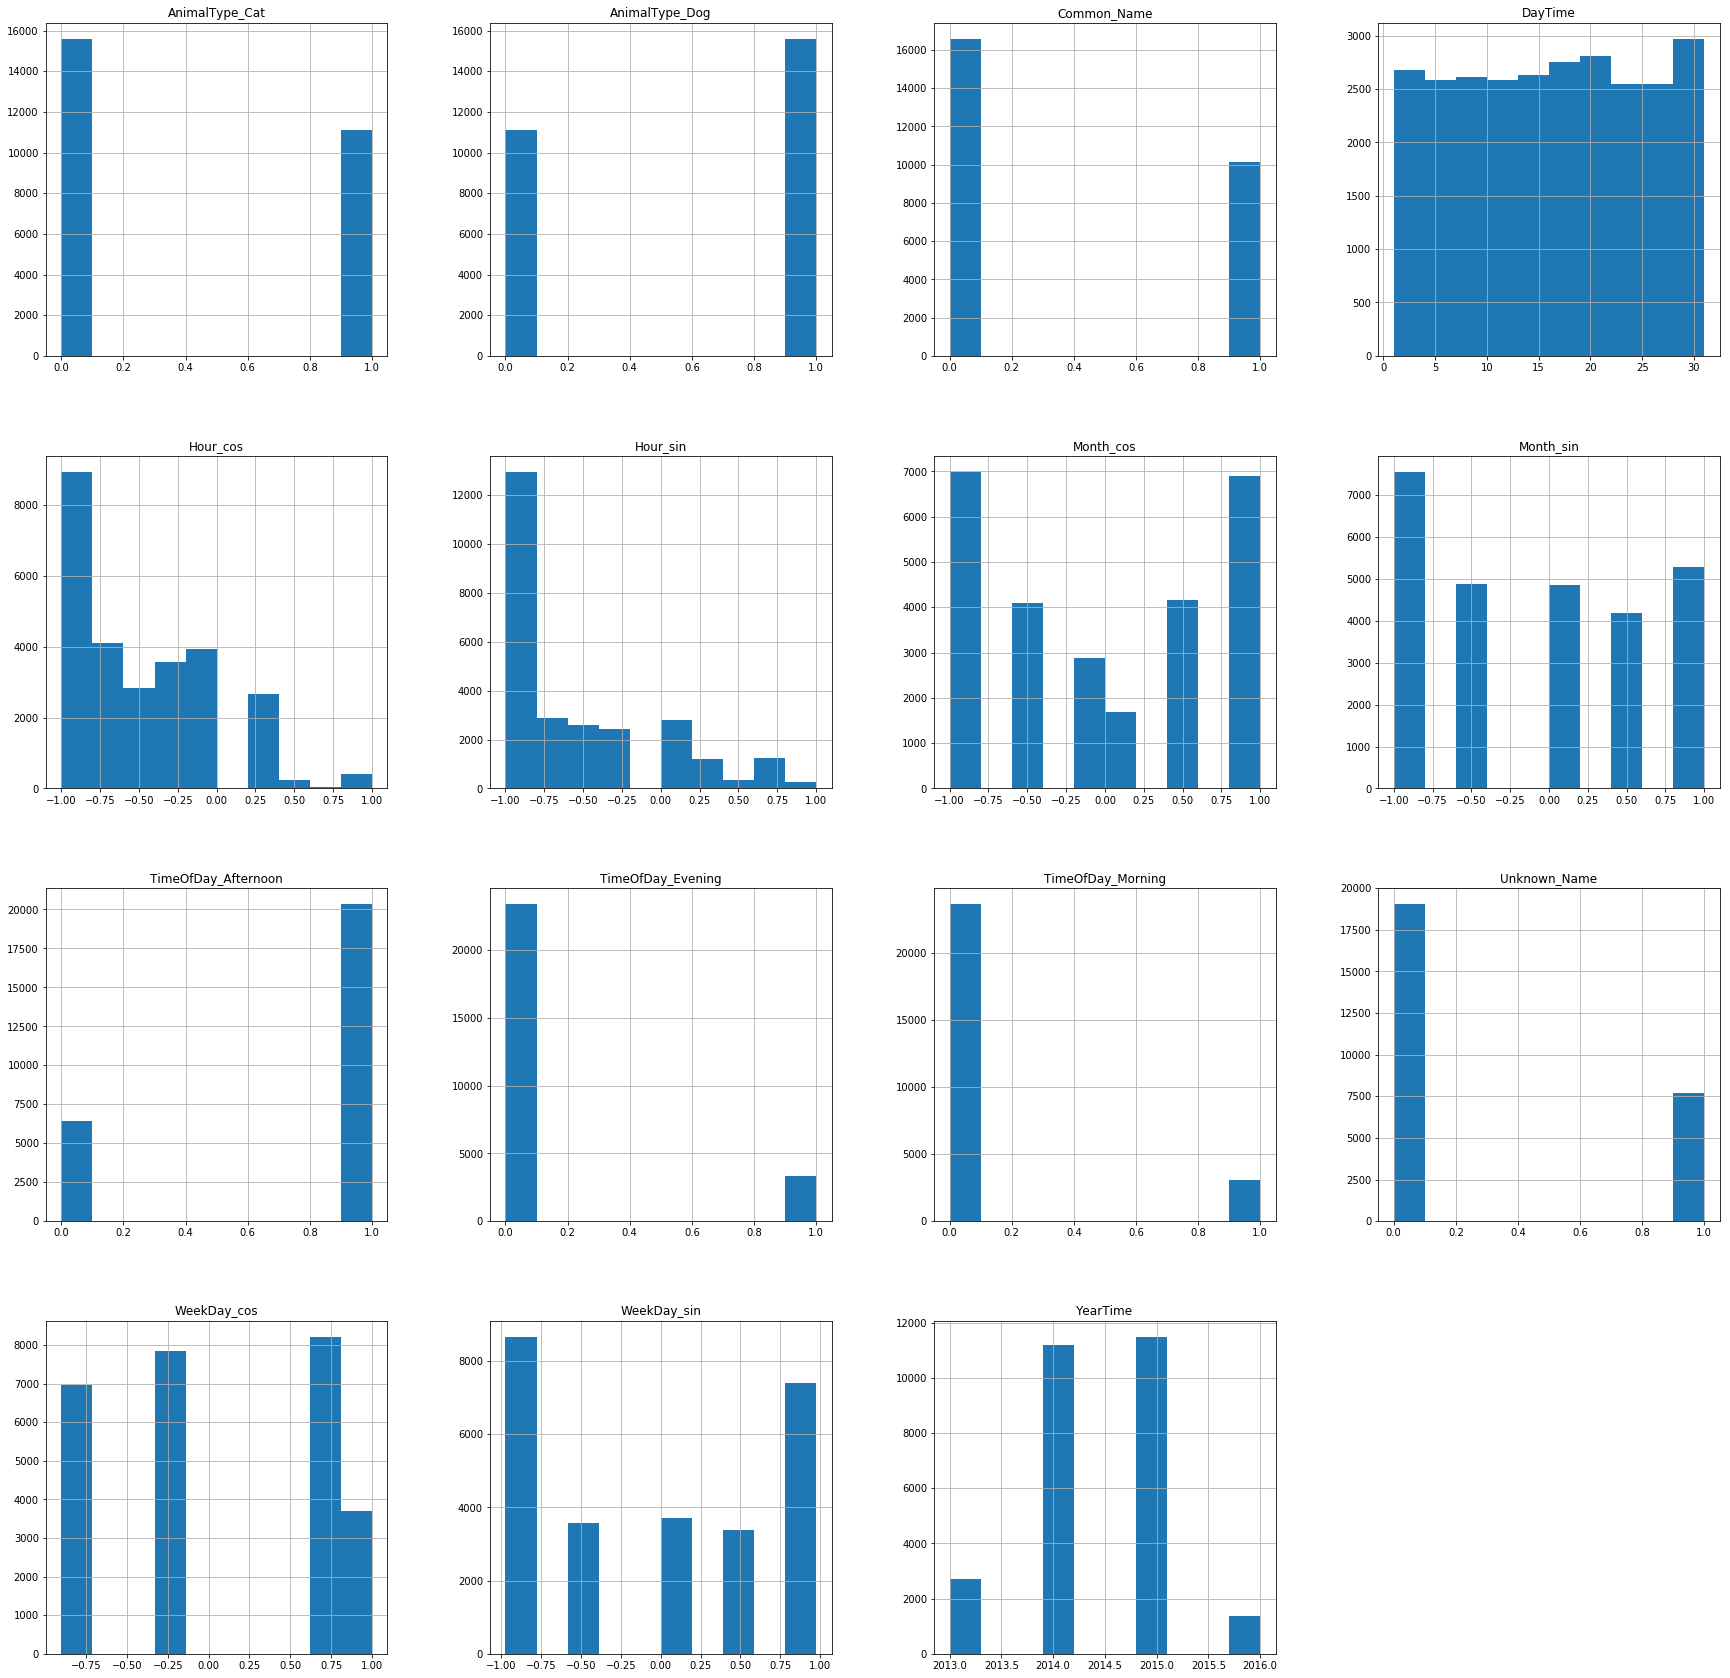

In [28]:
#histograms for each variable in df
hist = train.hist(bins=10,figsize =(30,30))

### Categorical Features 

/home/andreia/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


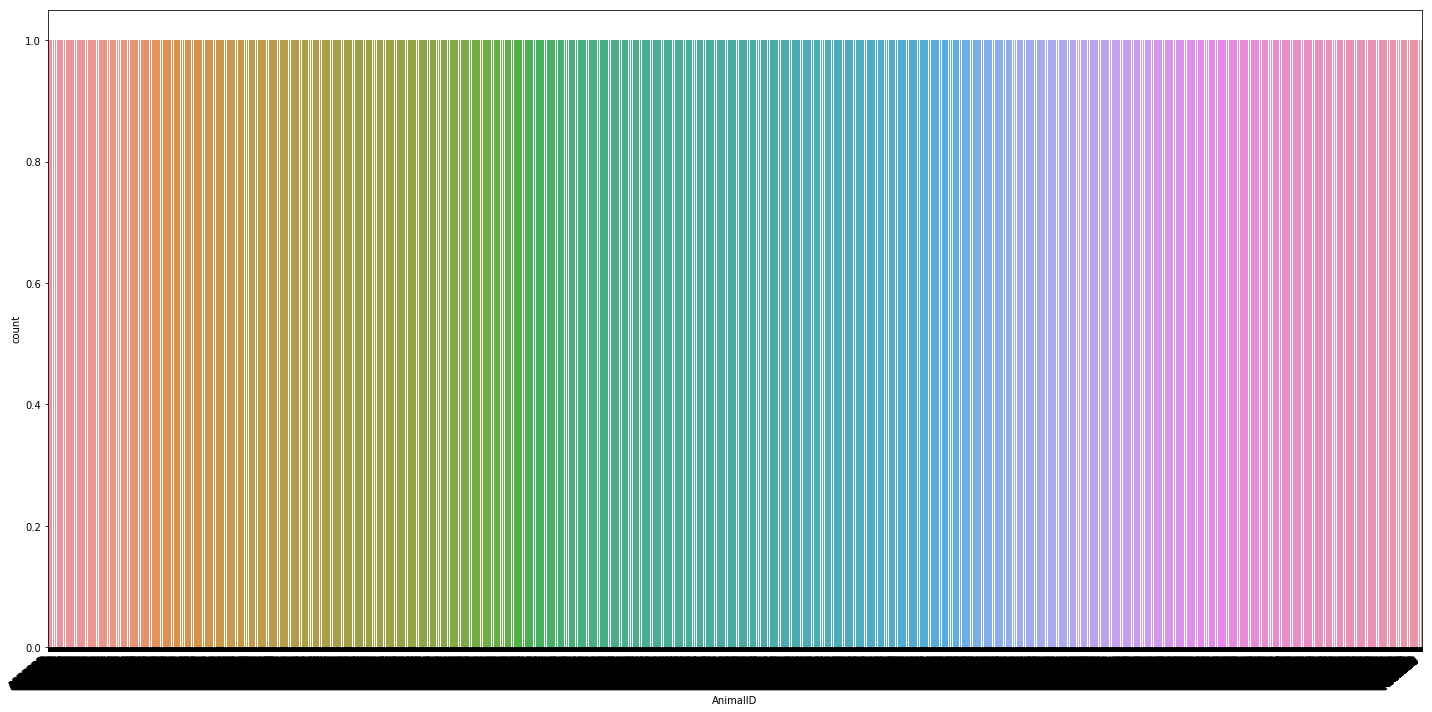

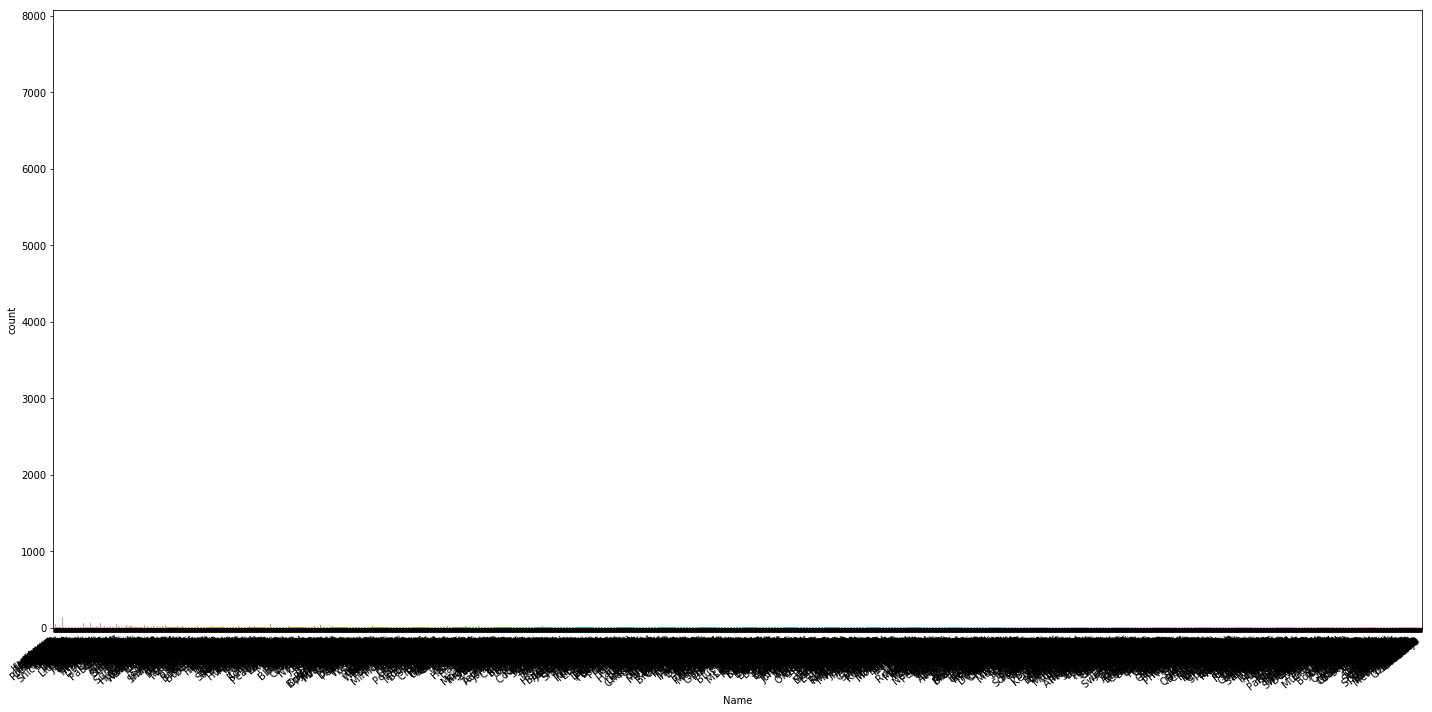

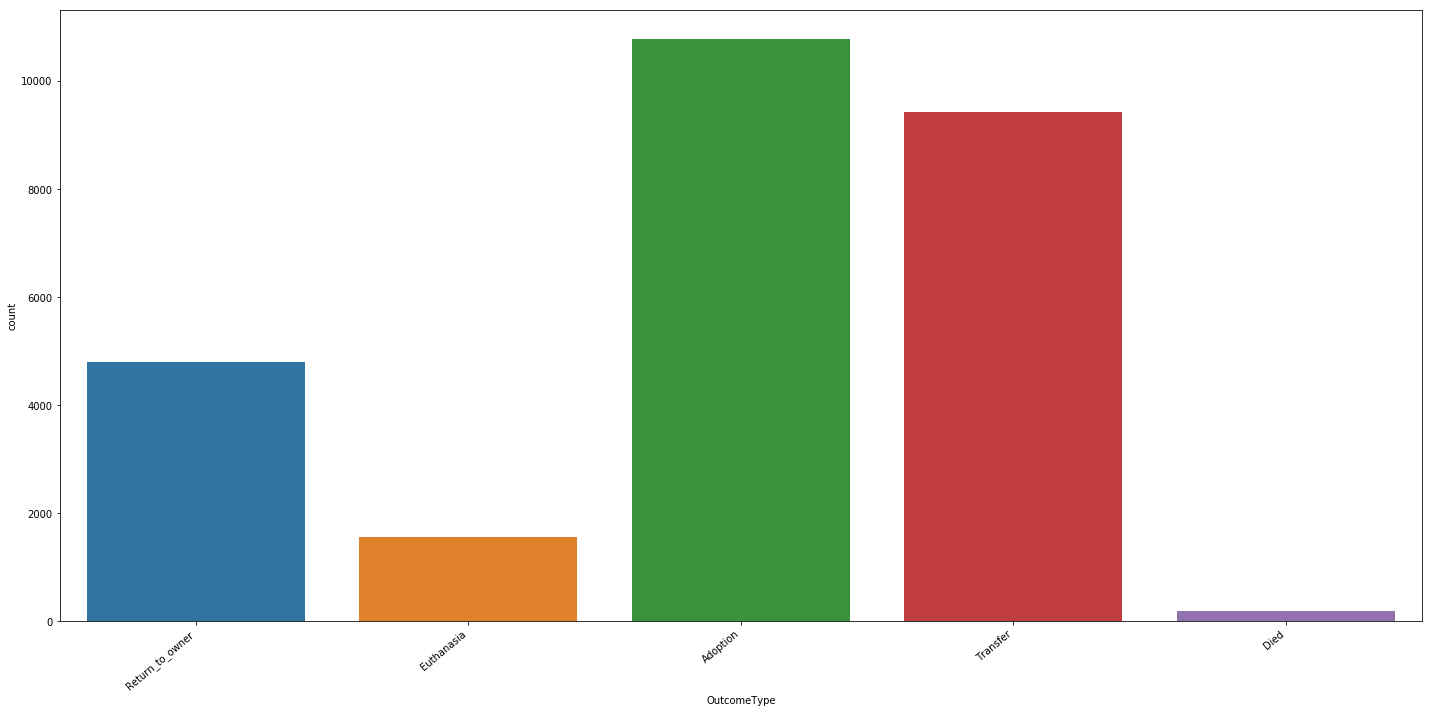

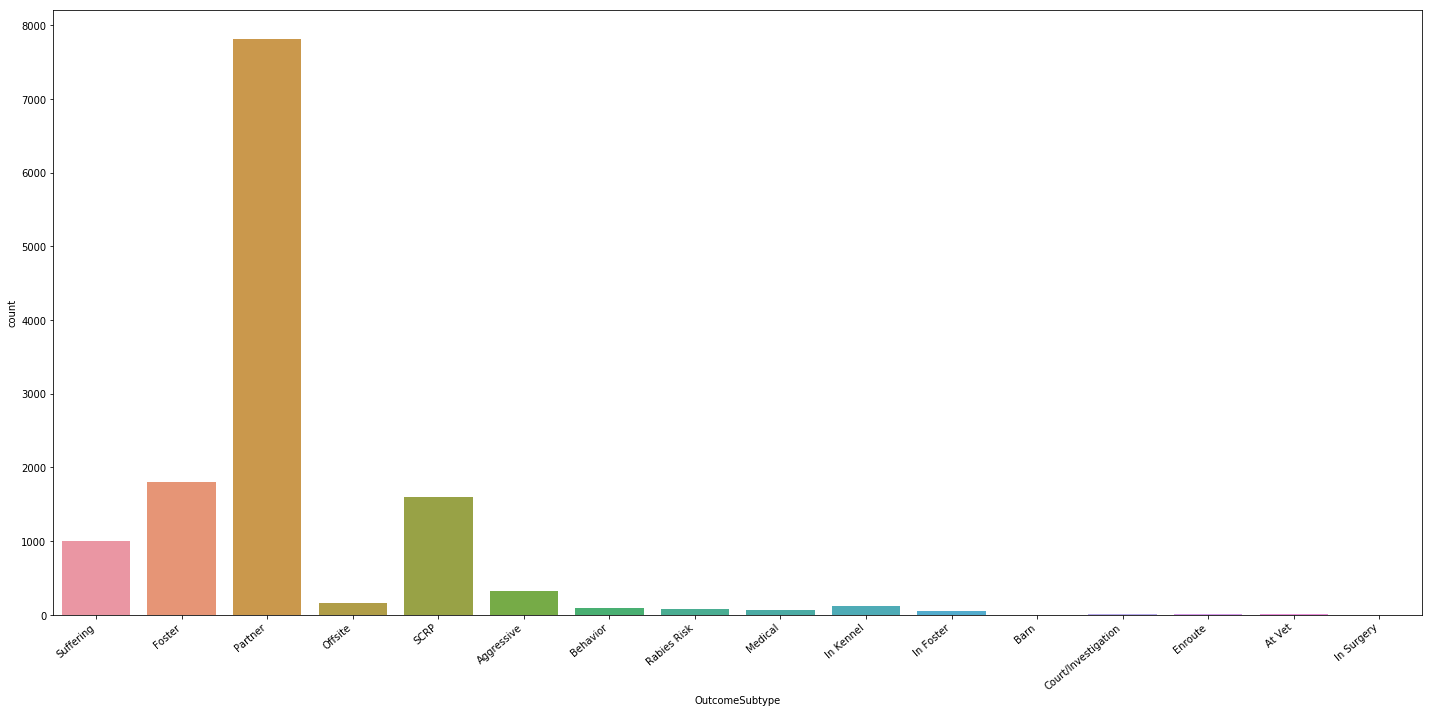

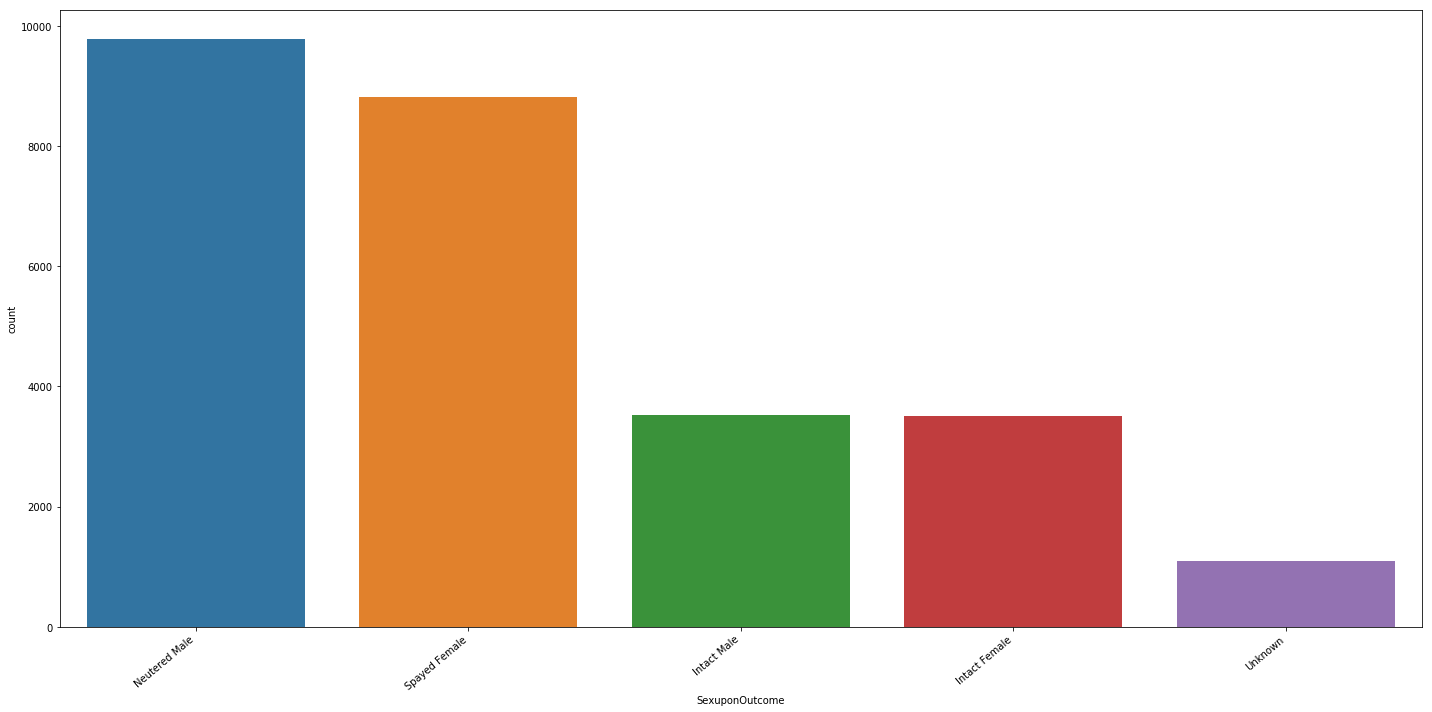

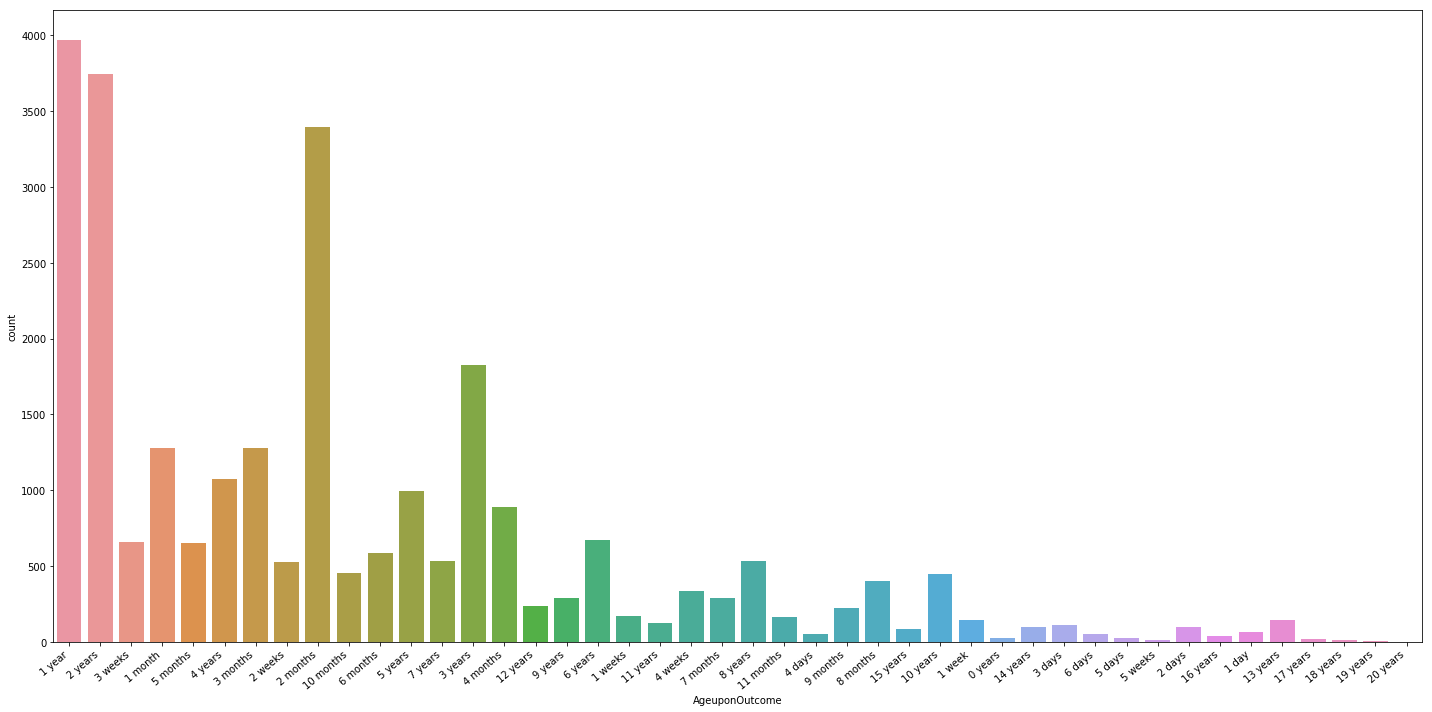

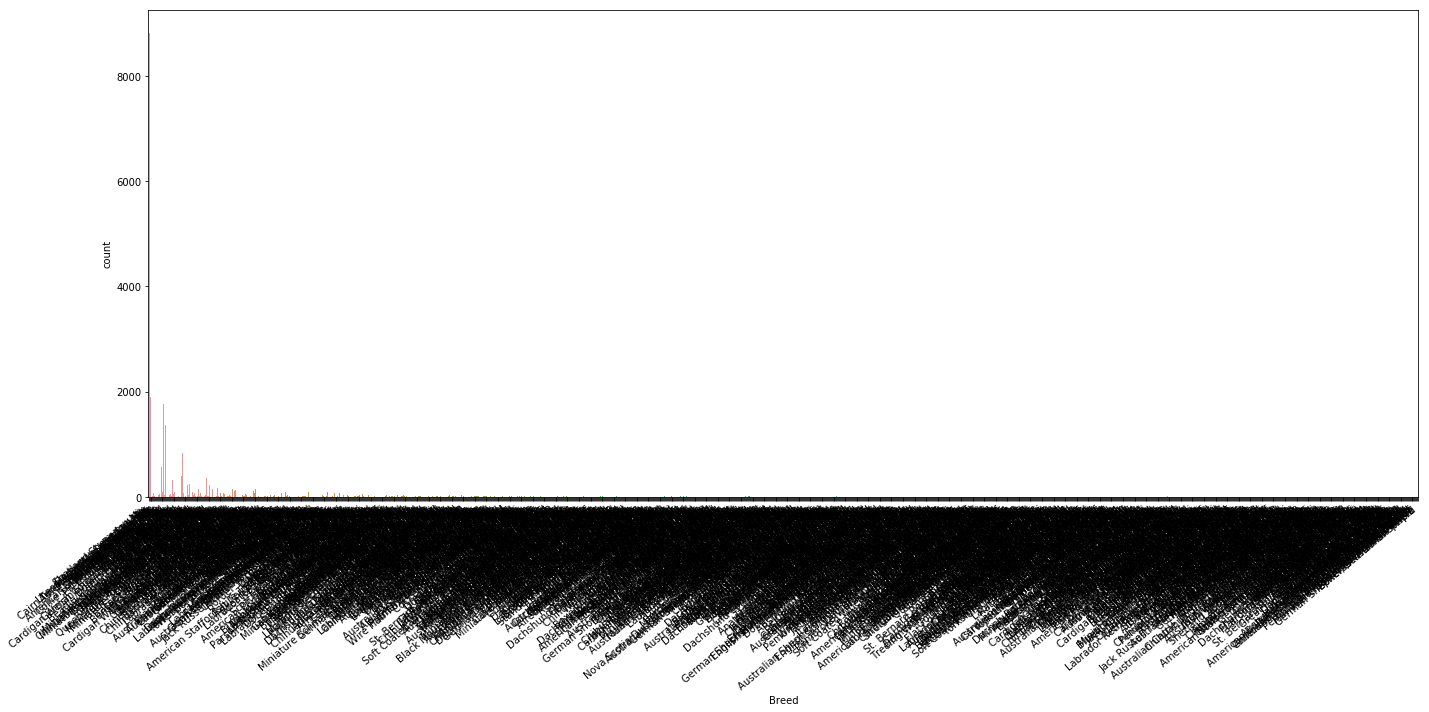

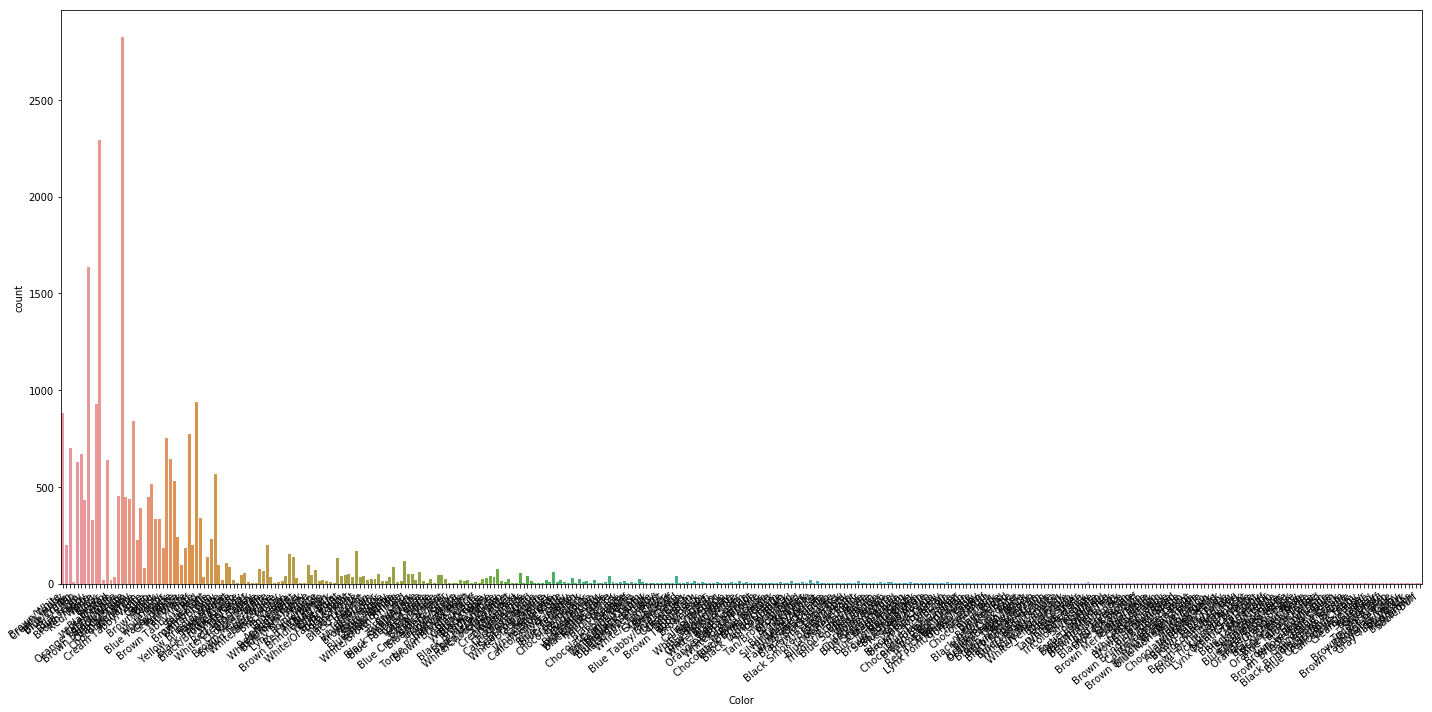

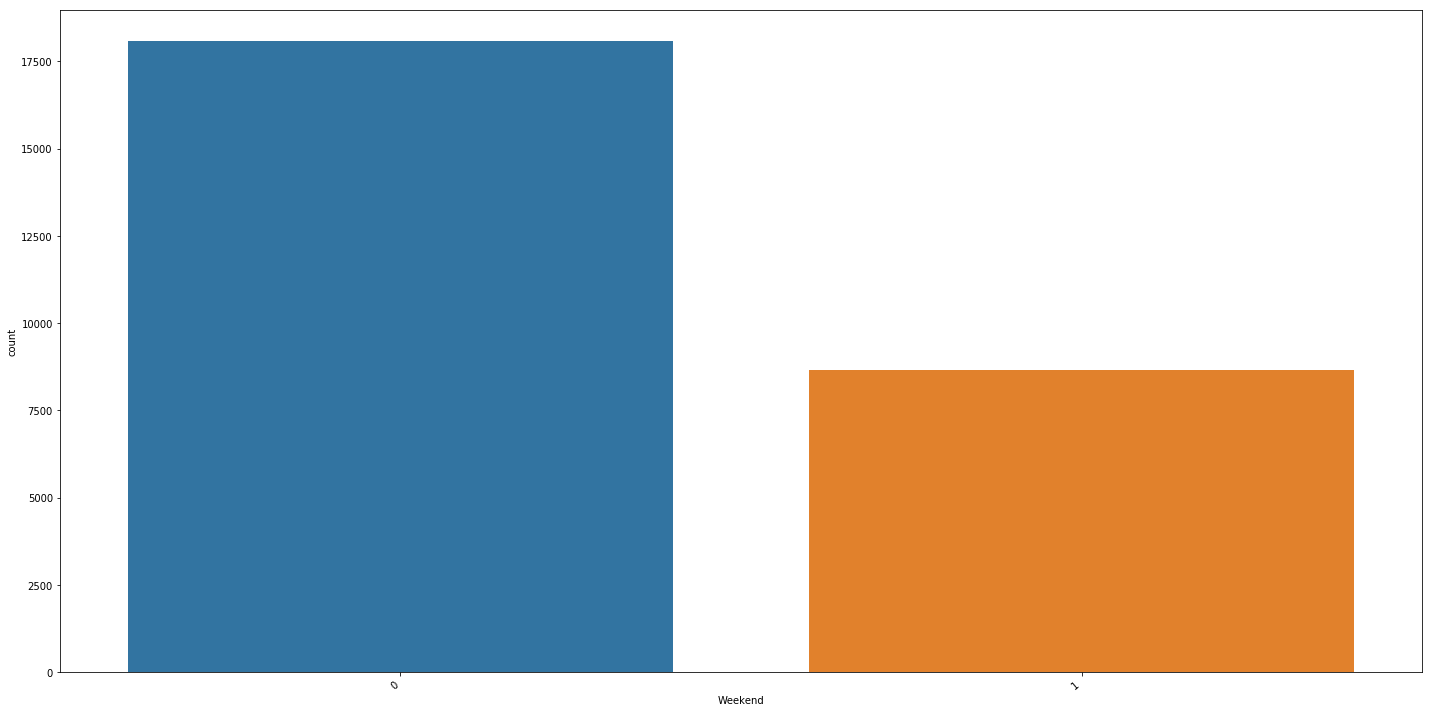

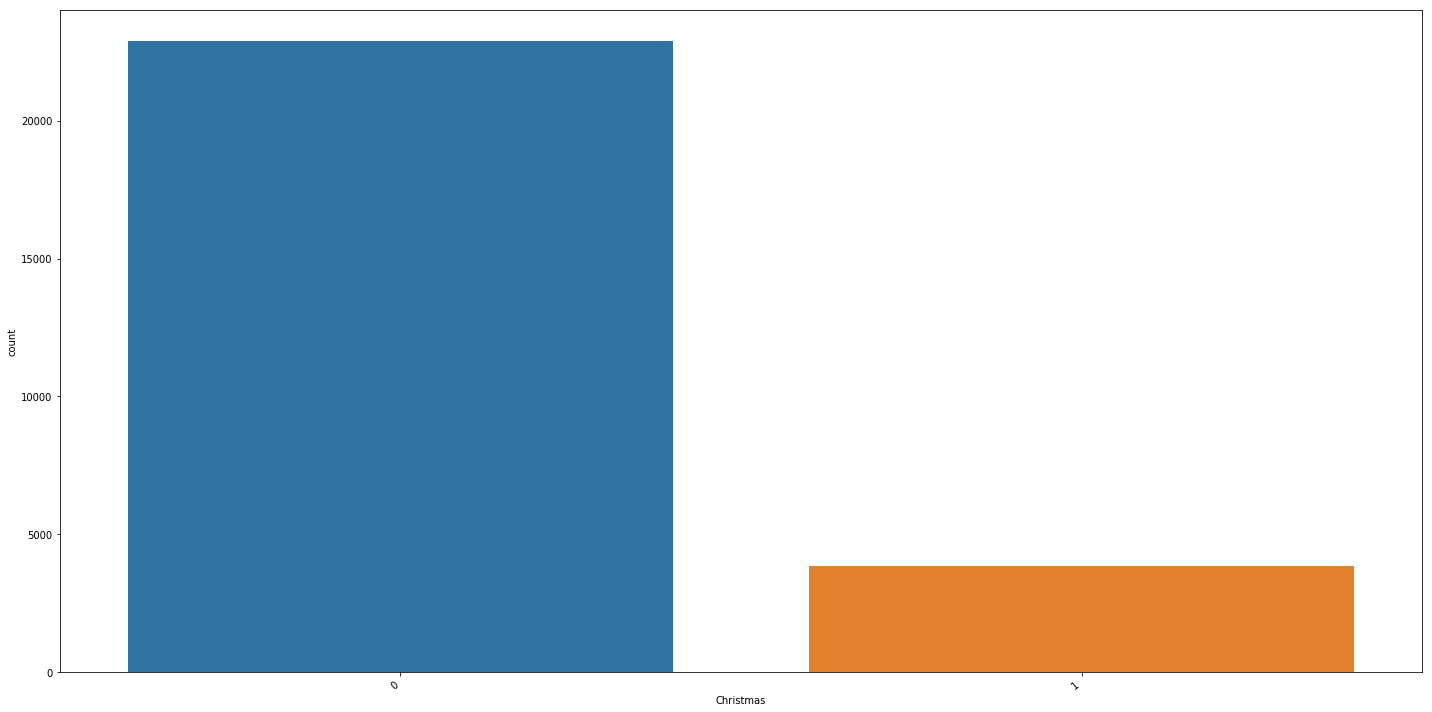

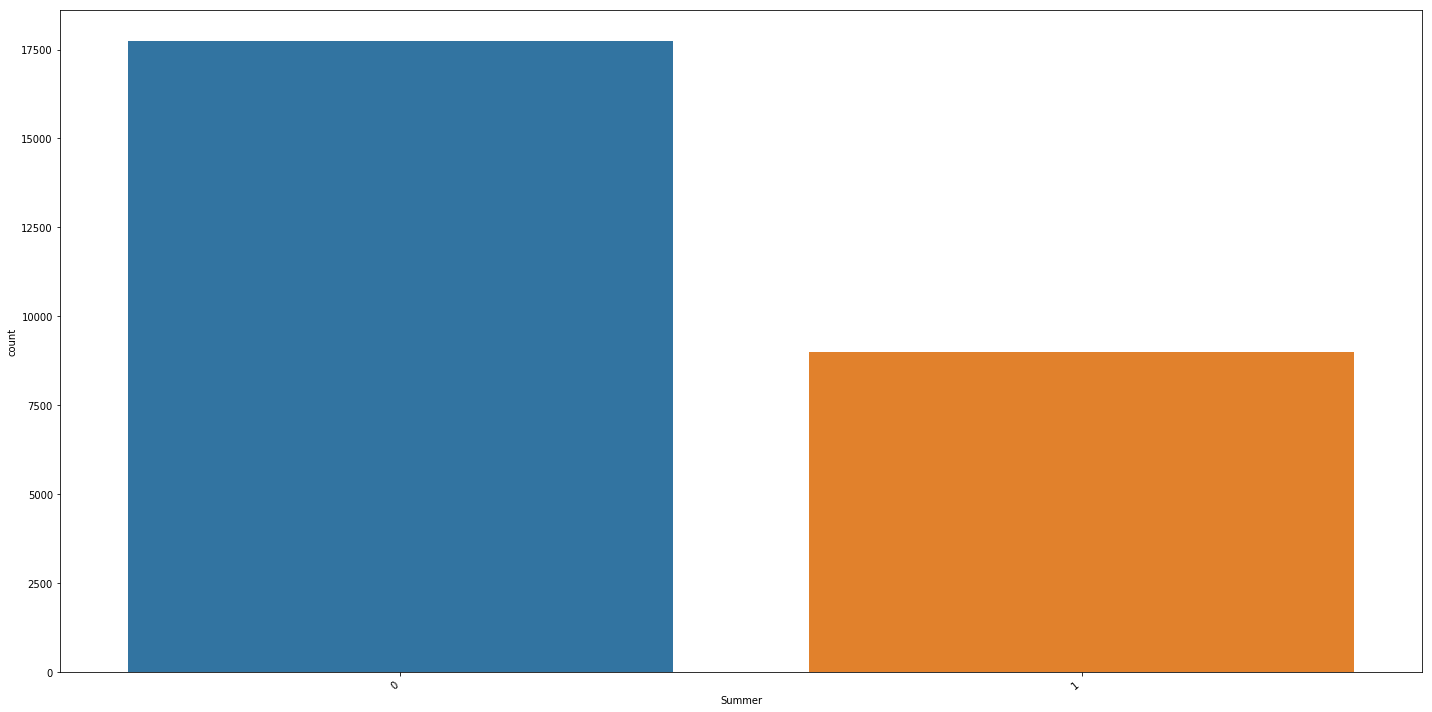

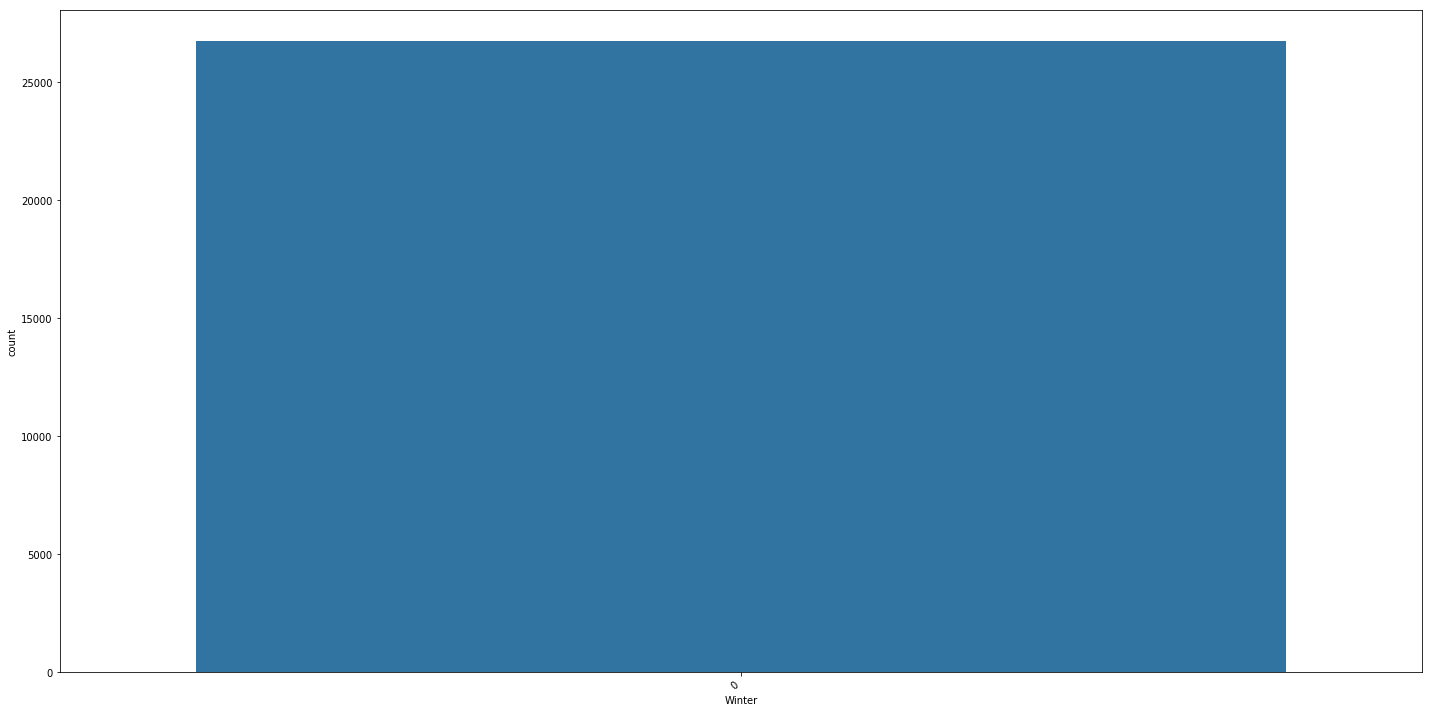

In [30]:
#select categorical variables only
df_cat = train.select_dtypes(include = 'object').copy()

for ColumnName in df_cat.columns:   
    fig, ax =plt.subplots(1, figsize=(20, 10))
    #get counts of each variable value
    df_cat[ColumnName].value_counts()
    #count plot for one variable
    ax = sns.countplot(x = df_cat[ColumnName], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")    
    fig.tight_layout()
    fig.show()

## Class Distribution

In [ ]:
x=dataset['Outcome']
sns.set(rc={'figure.figsize':(12,10),"font.size":20,"axes.titlesize":20,"axes.labelsize":20,'xtick.bottom': True},style="white")
sns.distplot(x, hist=True);

## Polynomial FEng

In [27]:
from sklearn import preprocessing as pp
df=train.copy()
numerical=df.select_dtypes(include=['int', 'uint8', 'float', 'float64'])
df=df[numerical.columns]
    
poly = pp.PolynomialFeatures(2)
output_nparray = poly.fit_transform(df)
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(df.columns,p) for p in poly.powers_]]
output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
poly.get_feature_names(df.columns)
#['1', 'a', 'b', 'c', 'a^2', 'a b', 'a c', 'b^2', 'b c', 'c^2']

['1',
 'DayTime',
 'YearTime',
 'Hour_sin',
 'Hour_cos',
 'Month_sin',
 'Month_cos',
 'WeekDay_sin',
 'WeekDay_cos',
 'Unknown_Name',
 'Common_Name',
 'TimeOfDay_Afternoon',
 'TimeOfDay_Evening',
 'TimeOfDay_Morning',
 'AnimalType_Cat',
 'AnimalType_Dog',
 'DayTime^2',
 'DayTime YearTime',
 'DayTime Hour_sin',
 'DayTime Hour_cos',
 'DayTime Month_sin',
 'DayTime Month_cos',
 'DayTime WeekDay_sin',
 'DayTime WeekDay_cos',
 'DayTime Unknown_Name',
 'DayTime Common_Name',
 'DayTime TimeOfDay_Afternoon',
 'DayTime TimeOfDay_Evening',
 'DayTime TimeOfDay_Morning',
 'DayTime AnimalType_Cat',
 'DayTime AnimalType_Dog',
 'YearTime^2',
 'YearTime Hour_sin',
 'YearTime Hour_cos',
 'YearTime Month_sin',
 'YearTime Month_cos',
 'YearTime WeekDay_sin',
 'YearTime WeekDay_cos',
 'YearTime Unknown_Name',
 'YearTime Common_Name',
 'YearTime TimeOfDay_Afternoon',
 'YearTime TimeOfDay_Evening',
 'YearTime TimeOfDay_Morning',
 'YearTime AnimalType_Cat',
 'YearTime AnimalType_Dog',
 'Hour_sin^2',
 'Hour_s

## TPOT 

In [ ]:
#https://epistasislab.github.io/tpot/using/#parallel-training-with-dask 
from tpot import TPOTClassifier

pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))

In [ ]:
pipeline_optimizer.export('tpot_exported_pipeline.py')

In [ ]:
######## NOTHING BELOW













########

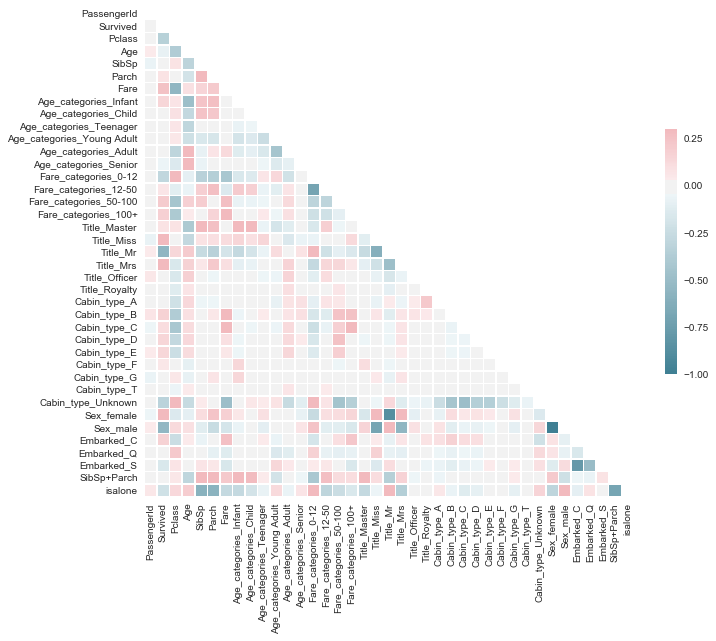

In [11]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

plot_correlation_heatmap(train)

In [12]:
correlations_data = train.corr()['Survived'].sort_values()
print(correlations_data)

Title_Mr                     -0.549199
Sex_male                     -0.543351
Pclass                       -0.338481
Cabin_type_Unknown           -0.316912
Fare_categories_0-12         -0.287849
isalone                      -0.203367
Embarked_S                   -0.149683
Age                          -0.077221
Age_categories_Senior        -0.051224
SibSp                        -0.035322
Title_Officer                -0.031316
Cabin_type_T                 -0.026456
Age_categories_Child         -0.008328
PassengerId                  -0.005007
Age_categories_Young Adult   -0.001949
Embarked_Q                    0.003650
Cabin_type_G                  0.016040
Age_categories_Adult          0.017590
Cabin_type_A                  0.022287
SibSp+Parch                   0.026633
Age_categories_Teenager       0.026859
Title_Royalty                 0.033391
Cabin_type_F                  0.057935
Fare_categories_12-50         0.065790
Parch                         0.081629
Title_Master             

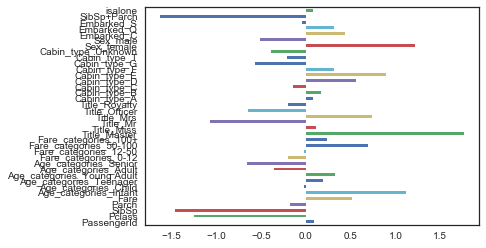

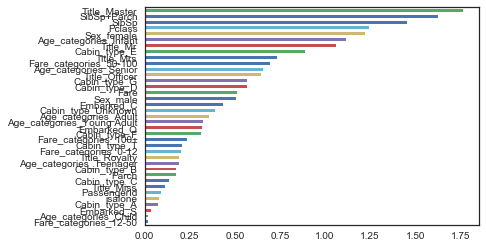

In [14]:
#Feature importance with: Logistic Regression, RFECV, PCA

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(valid_train,train['Survived'])

coefficients = lr.coef_

feature_importance = pd.Series(coefficients[0], index=valid_train.columns)
feature_importance.plot.barh()
plt.show()
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 

knn={
    "name": "KNeighborsClassifier",
    "estimator": KNeighborsClassifier(),
    "hyperparameters":
        {
            "n_neighbors": range(1,20,2),
            "weights": ["distance", "uniform"],
            "algorithm": ["ball_tree", "kd_tree", "brute"],
            "p": [1,2]
        }
}

rf={
    "name": "RandomForestClassifier",
    "estimator": RandomForestClassifier(),
    "hyperparameters":
        {
            "n_estimators": [4, 6, 9],
            "criterion": ["entropy", "gini"],
            "max_depth": [2, 5, 10],
            "max_features": ["log2", "sqrt"],
            "min_samples_leaf": [1, 5, 8],
            "min_samples_split": [2, 3, 5]
        }
}

lr={
    "name": "LogisticrRegression",
    "estimator": LogisticRegression(),
    "hyperparameters":
    {
        "solver": ["newton-cg", "lbfgs", "liblinear"]
    }
}

models=[knn, rf, lr]
X = valid_train[['Pclass', 'SibSp', 'Title_Master', 'Sex_female', 'SibSp+Parch']]
y = train['Survived']

for dic in models:
    model = dic['estimator']
    hyperparamenters = dic['hyperparameters']
    grid = GridSearchCV(model, param_grid=hyperparamenters, cv=10)

    grid.fit(X, y)
    print(grid.best_params_)
    print(grid.best_score_)



{'algorithm': 'brute', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.8181818181818182
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 6}
0.8316498316498316
{'solver': 'newton-cg'}
0.8282828282828283


In [51]:
X = valid_train
Y = train['Survived']
x = valid_holdout

cls=RandomForestClassifier(criterion='gini', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 5, min_samples_split= 5, n_estimators= 9)

cls.fit(X, Y)
predictions=cls.predict(x)
